I'm making a project that detects, whether a person is a male or a female, based on facial attributes and measurements. Various Python Machine Learning methods will be used to find the one with the best accuracy.

First we need to import some python libraries (to work with data set, visualize it and libraries for ML) as well as our data.

In [2]:
#libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import VotingClassifier,RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#data
dataset = pd.read_csv('./gender_data.csv')

To check our data we can display first and last ten rows. Doing that will allow us to get some information about what are we even working with.

In [3]:
#first 10 rows
dataset.head(10)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
5,1,13.0,6.8,1,1,1,1,Male
6,1,15.3,6.2,1,1,1,0,Male
7,0,13.0,5.2,0,0,0,0,Female
8,1,11.9,5.4,1,0,1,1,Female
9,1,12.1,5.4,0,0,0,0,Female


In [4]:
#last 10 rows
dataset.tail(10)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
4991,1,12.1,5.8,0,0,0,0,Female
4992,1,14.1,7.0,1,1,1,1,Male
4993,1,11.6,5.9,0,0,0,1,Female
4994,1,12.9,7.0,1,1,1,1,Male
4995,1,12.3,6.9,0,1,1,1,Male
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female
5000,1,15.4,5.4,1,1,1,1,Male


Also, we can see that columns: long_hair, nose_wide, nose_long, lips_thin and distance_nose_to_lip_long are boolean type so it's either 0 or 1. We can also check that by using nunique() function.

In [12]:
dataset.nunique()

long_hair                     2
forehead_width_cm            42
forehead_height_cm           21
nose_wide                     2
nose_long                     2
lips_thin                     2
distance_nose_to_lip_long     2
gender                        2
dtype: int64

We can see that those values are indeed 0 or 1. What's more, Gender also is either 'Male' or 'Female', but its object data type, we will change that to 0 and 1 later.

Also as we can see, we have 5001 rows and 8 columns. We can also get the information about number of rows and columns using shape attribute.

In [7]:
#display the size of the dataset
dataset.shape

(5001, 8)

Now It's time to get some information about the columns and their data types.

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


We can see that all of the data types seem good, although we will work on gender column in a moment. Also, we can see that there are no missing values, but we can double check that.

In [10]:
dataset.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

Also to get a better understanding of a dataset we can use describe() function, which will give us information like: max, min, mean, etc.

In [11]:
dataset.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


Now, it's time to visualize data that would be beneficial for us, which is differences in forehead_width_cm	and forehead_height_cm for both genders and also nose_long and nose_wide for both genders. 

<Axes: xlabel='forehead_width_cm', ylabel='forehead_height_cm'>

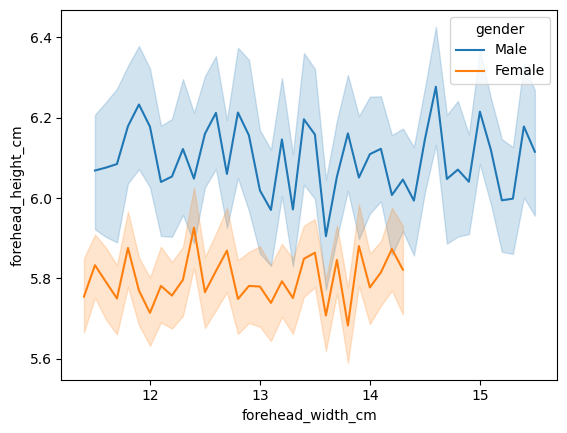

In [17]:
#forehead data
sns.lineplot(x='forehead_width_cm', y='forehead_height_cm', hue='gender', data=dataset)

<Axes: xlabel='nose_long', ylabel='nose_wide'>

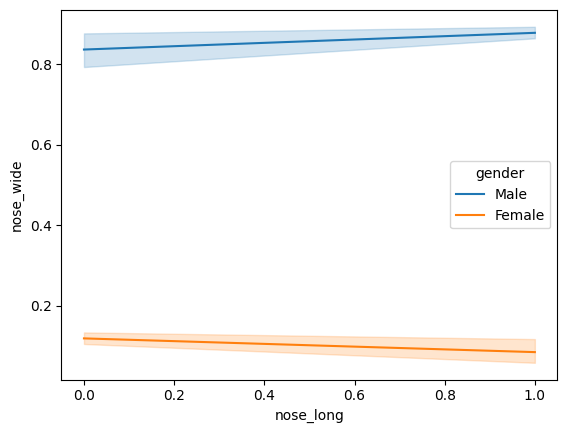

In [18]:
#nose data
sns.lineplot(x='nose_long', y='nose_wide', hue='gender', data=dataset)

We can see, that there is a visible difference between both genders, which may result in high model accuracy.

Now the last think, before making a model, we would prefer gender to be in 0 and 1 type, instead of Female and Male

In [19]:
gender_binary = {'Female':0, 'Male':1}
dataset['gender'] = dataset['gender'].map(gender_binary)

Let's check if it is as we intended

In [20]:
dataset.head(10)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
5,1,13.0,6.8,1,1,1,1,1
6,1,15.3,6.2,1,1,1,0,1
7,0,13.0,5.2,0,0,0,0,0
8,1,11.9,5.4,1,0,1,1,0
9,1,12.1,5.4,0,0,0,0,0


Time to start making a model now, first we need to separate features and target variable.

In [21]:
X = dataset.drop('gender', axis=1)
y = dataset['gender']

Now let's split the data for testing and traing process. We need to import some things for that

In [23]:
#import
from sklearn.model_selection import train_test_split, GridSearchCV

#split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

Now, we should print every variable to see if everything seems ok

In [24]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(3500, 7)
(1501, 7)
(3500,)
(1501,)


Great, everything seems great, so now we can test different approaches to find the best working one. Let's start with importing everything we need

In [44]:
#import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

We can start with DecisionTreeClassifier

In [43]:
dt = DecisionTreeClassifier(random_state=0)

dt.fit(X_train, y_train)
dt_pred = dt.predict(X_val)
dt_acc = accuracy_score(y_val, dt_pred)
print('Accuracy of Decision Tree is: {:.2f}%'.format(dt_acc*100))

Accuracy of Decision Tree is: 96.27%


Let's try to find ways for better accuracy

In [50]:
dt = DecisionTreeClassifier(random_state=0)
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 4, 10],
    'max_features': [None, 'sqrt', 'log2']
}
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)
best_dt = grid_search_dt.best_estimator_

dt_acc_upgrade = best_dt.score(X_val, y_val)
print('Accuracy of Decision Tree is: {:.2f}%'.format(dt_acc_upgrade*100))

Accuracy of Decision Tree is: 97.20%


As we can see, accuracy after upgrades is almost 1% higher

Next, let's try RandomForestClassifier

In [36]:
rf = RandomForestClassifier(random_state=0)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_val)
rf_acc = accuracy_score(y_val, rf_pred)
print('Accuracy of Random Forest is: {:.2f}%'.format(rf_acc*100))

Accuracy of Random Forest is: 97.07%


Let's also try to make the accuracy higher

In [51]:
rf = RandomForestClassifier(random_state=0)
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 4, 10],
    'max_features': ['sqrt', 'log2']
}
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_

rf_acc_upgrade = best_rf.score(X_val, y_val)
print('Accuracy of Random Forest is: {:.2f}%'.format(rf_acc_upgrade*100))


Accuracy of Random Forest is: 97.34%


The operation took almost 5min 30s and accuracy improvement is only 0.27% higher

Now, we can try logistic regression

In [52]:
lr = LogisticRegression(random_state=0)

lr.fit(X_train, y_train)
lr_pred = lr.predict(X_val)
lr_acc = accuracy_score(y_val, lr_pred)
print('Accuracy of Logistic Regression is: {:.2f}%'.format(lr_acc*100))

Accuracy of Logistic Regression is: 96.94%


let's try to upgrade the accuracy

In [65]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['l2'],
    'max_iter': [100, 200, 300]
}
lr = LogisticRegression(random_state=0)
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)
best_lr = grid_search_lr.best_estimator_

lr_pred = best_lr.predict(X_val)
lr_acc = accuracy_score(y_val, lr_pred)
print('Best Logistic Regression accuracy: {:.2f}%'.format(lr_acc * 100))

Best Logistic Regression accuracy: 97.00%


Accuracy is only 0.06% better, that does not change much

Lastly, we can see if KNeighbors works well

In [53]:
knn = KNeighborsClassifier()
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train, y_train)
model.best_params_

{'n_neighbors': 8}

In [67]:
kn = KNeighborsClassifier(n_neighbors=8)

kn.fit(X_train, y_train)
kn_pred = kn.predict(X_val)
kn_acc = accuracy_score(y_val, kn_pred)
print('Accuracy of KNeighbors is: {:.2f}%'.format(kn_acc*100))

Accuracy of KNeighbors is: 97.07%


Conclusion:
Accuracy of Decision Tree is: 96.27% and after upgrade 97.20%
Accuracy of Random Forest is: 97.07% and after upgrade 97.34%
Accuracy of Logistic Regression is: 96.94% and after upgrade 97.00%
Accuracy of KNeighbors is: 97.07%